In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

## Fuzzy-Mengen

Eine Fuzzy-Menge ist eine Erweiterung der klassischen Mengenlehre, die es ermöglicht, eine unscharfe oder vage Definition von Objekten zu modellieren. Im Gegensatz zu klassischen Mengen, bei denen jedes Element entweder Mitglied oder nicht Mitglied der Menge ist, kann ein Element in einer Fuzzy-Menge einen Grad der Zugehörigkeit von 0 bis 1 haben.

Eine Fuzzy-Menge wird durch eine Zugehörigkeitsfunktion definiert, die jedem Element in der Menge einen Grad der Zugehörigkeit zuweist. Die Zugehörigkeitsfunktion kann auf verschiedene Arten definiert werden, z.B. durch eine mathematische Funktion, eine logische Aussage oder durch linguistische Ausdrücke.

Ein Beispiel einer Fuzzy-Menge kann eine Menge von großen Objekten sein. Ein Objekt kann einen Grad der Zugehörigkeit zur Menge haben, je nachdem, wie groß es ist. Ein kleines Auto hat vielleicht einen Grad der Zugehörigkeit von 0,3, während ein großer Lastwagen einen Grad der Zugehörigkeit von 0,9 hat.

## Aufgaben

1. Definieren Sie eine Fuzzy-Menge namens "positive" mit einer Gauß-Funktion, die um den Wert 1 zentriert ist und eine Standardabweichung von 0,5 hat.
2. Definieren Sie eine Fuzzy-Menge namens "negative" mit einer Gauß-Funktion, die um den Wert -1 zentriert ist und eine Standardabweichung von 0,5 hat.
3. Definieren Sie eine Fuzzy-Menge namens "medium" mit einer Gauß-Funktion, die um den Wert 0 zentriert ist und eine Standardabweichung von 0,5 hat.
4. Zeichnen Sie die Fuzzy-Mengen "positive", "negative" und "medium" auf derselben Achse.


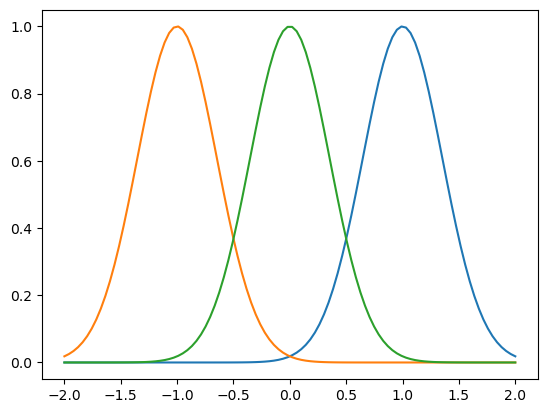

In [8]:
### Lösung ###
sigma = 0.5
def gaussian(x, m, sigma):
    return np.exp(-(x-m) ** 2/ (sigma**2))

x = np.linspace(-2, 2, 100)
y1 = gaussian(x, 1, sigma)
y2 = gaussian(x, -1, sigma)
y3 = gaussian(x, 0, sigma)
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.show()

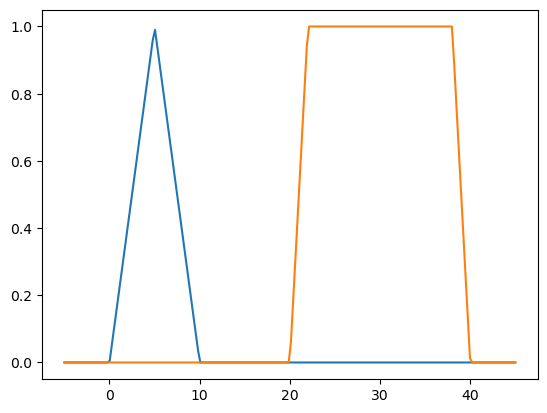

In [15]:
### Lösung ### Aufgabe 2a)
def triangular(x, a, b, c):
    value = np.minimum((x-a)/(b-a), (c-x)/(c-b))
    return np.maximum(0, value)

def trapezoidal(x, a, b, c, d):
    return np.maximum(0, np.minimum((x-a)/(b-a), np.minimum(1, (d-x)/(d-c))))

x = np.linspace(-5, 45, 200)
small = triangular(x,0,5,10)
large = trapezoidal(x, 20,22,38,40)

plt.plot(x, small)
plt.plot(x, large)
plt.show()

## Zugehörigkeitsfunktionen

1. Definieren Sie eine Fuzzy-Menge namens "small" mit einer Triangular-Funktion, die zwischen den Werten 0 und 10 definiert ist und ihr Maximum bei 5 hat.
2. Definieren Sie eine Fuzzy-Menge namens "large" mit einer Trapezoidal-Funktion, die zwischen den Werten 20 und 40 definiert ist, ihr Maximum bei 30 hat und eine Steigung von 0,5 aufweist.
3. Zeichnen Sie die Fuzzy-Mengen "small" und "large" auf derselben Achse.
4. Definieren Sie eine Fuzzy-Menge namens "red" als Singleton mit dem Wert 1 bei der Farbe Rot und einem Wert von 0 bei allen anderen Farben.
5. Definieren Sie eine Fuzzy-Menge namens "green" als Singleton mit dem Wert 1 bei der Farbe Grün und einem Wert von 0 bei allen anderen Farben.
6. Zeichnen Sie die Fuzzy-Mengen "red" und "green" auf derselben Achse.
7. Definieren Sie eine Fuzzy-Menge namens "positive_slope" mit einer Sigmoid-Funktion, die bei einem Wert von 0 einen Wert von 0,5 hat und eine Steigung von 0,2 aufweist.
8. Definieren Sie eine Fuzzy-Menge namens "negative_slope" mit einer Sigmoid-Funktion, die bei einem Wert von 10 einen Wert von 0,5 hat und eine Steigung von -0,2 aufweist.
9. Zeichnen Sie die Fuzzy-Mengen "positive_slope" und "negative_slope" auf derselben Achse.
10. Definieren Sie eine Fuzzy-Menge namens "low" mit einer Z-Shape-Funktion, die zwischen den Werten 0 und 10 definiert ist und ihr Maximum bei 5 hat.
11. Definieren Sie eine Fuzzy-Menge namens "high" mit einer Sigmoid-Funktion, die bei einem Wert von 10 einen Wert von 1 hat und eine Steigung von -0,5 aufweist.
12. Zeichnen Sie die Fuzzy-Mengen "low" und "high" auf derselben Achse.

In [ ]:
#10 (0,5) hat Wert 1

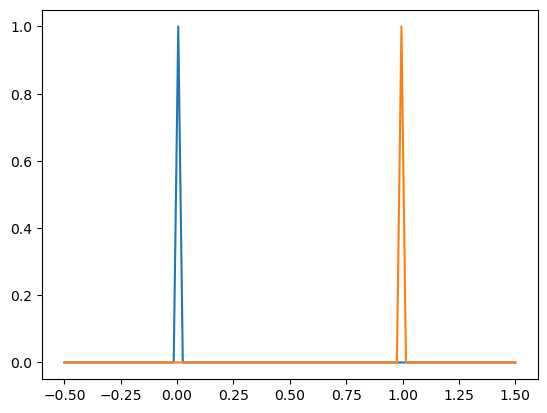

In [18]:
def singleton(x,m):
    return (np.abs(x-m) < 1e-2).astype(float)

x = np.linspace(-0.5, 1.5, 100)
red = singleton(x, 0.)
green = singleton(x, 1.)
plt.plot(x, red)
plt.plot(x, green)
plt.show()

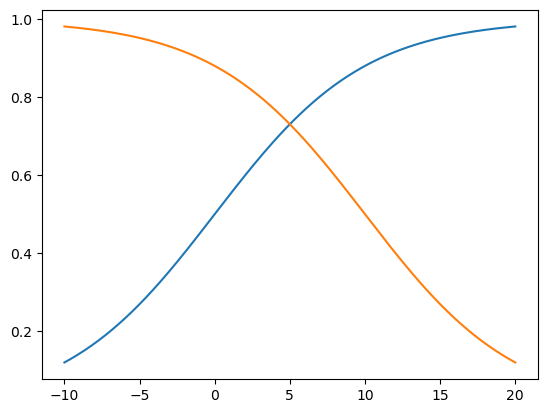

In [39]:
def sigmoid(x, a, m):
    return 1 / (1 + np.exp(-a * (x-m)))

x = np.linspace(-10, 20, 200)
positiv_slop = sigmoid(x, 0.2, 0)
negativ_slop = sigmoid(x, -0.2, 10)

plt.plot(x, positiv_slop)
plt.plot(x, negativ_slop)
plt.show()

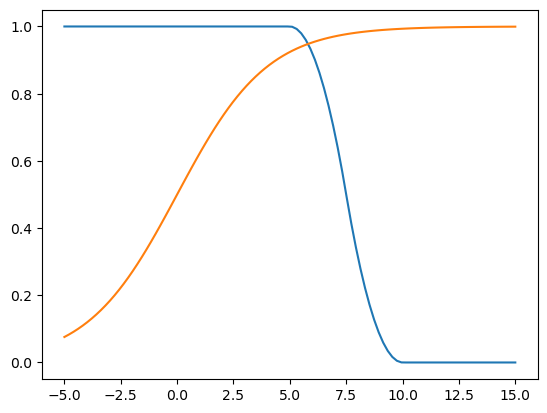

In [40]:
def z_shape(x,a,b):
    left = np.where(x <= a, 1, 0)
    m = np.logical_and(a <= x, x <= (a+b)/2)
    middle = np.where(m, 1-2*((x-a)/(b-a)) ** 2, 0)
    r = np.logical_and((a+b)/2 <= x, x <= b)
    right = np.where(r, 2*((x-b)/(b-a))**2, 0)
    return np.maximum(left, np.maximum(middle, right))

x = np.linspace(-5, 15, 100)
low = z_shape(x, 5, 10)
high = sigmoid(x, -(-0.5), 0)

plt.plot(x, low)
plt.plot(x, high)
plt.show()

# Niveaumenge:

Ein Kleidungsunternehmen möchte Fuzzy-Mengen und Niveau-Mengen verwenden, um die Größen ihrer Kleidungsstücke zu definieren. Die Größen sollen in den Bereichen "small", "medium" und "large" definiert werden, wobei "small" für Größen bis 10 steht, "medium" für Größen von 10 bis 20 und "large" für Größen ab 20.

Schreiben Sie eine Python-Funktion, die die Zugehörigkeit einer Größe zu jeder der drei Größen-Fuzzy-Mengen berechnet und dann die entsprechenden Niveau-Mengen zurückgibt. Verwenden Sie hierzu einen Schwellenwert von 0.5

In [3]:
### Lösung ###

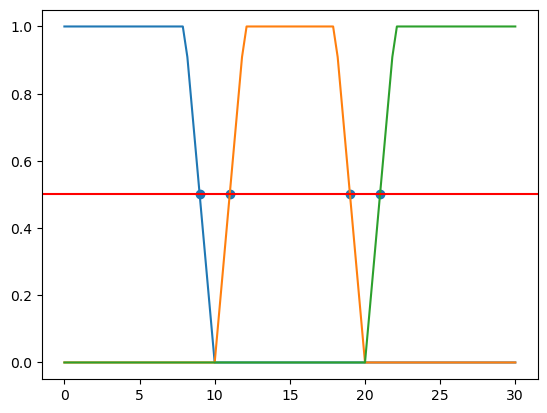

In [49]:
thres = 0.5
x = np.linspace(0, 30, 100)
small = trapezoidal(x,0-1e-2,0,8,10)
medium = trapezoidal(x, 10, 12, 18, 20)
large = trapezoidal(x, 20, 22, 30, 30+1e-2)
thresfunction = threshold(x, thres)

x1 = [9, 11, 19, 21]
y1 = [0.5, 0.5, 0.5, 0.5]

plt.plot(x, small)
plt.plot(x, medium)
plt.plot(x, large)
plt.axhline(y=thres, color='r',linestyle='-')
plt.scatter(x1, y1)

plt.show()